In [10]:
#Project 2, Case 1
import matplotlib.pyplot as plt
import numpy as np
import math as m

In [11]:
#Bottom Wall Prescribed Temperature
T_b = 250

In [12]:
#Physical Constants of the System
w = 0.1
l = 0.1
k = 10
q = 1.5e3

In [13]:
#Additional Variables
xdiv = 100
ydiv = 100
dx = l/(xdiv-1)
dy = w/(ydiv-1)
x = np.linspace(0,l,xdiv)
y = np.linspace(0,w,ydiv)

In [14]:
#Make an empty coefficient matrix
A = np.zeros(shape=(xdiv*ydiv, xdiv*ydiv))
#Make an empty vector
B = np.zeros(shape=(xdiv*ydiv, 1))

In [15]:
indices = []
for i in range(xdiv*ydiv):
    indices.append(i+1)
for i in indices:
    if i==1: #top left
        B[i-1] = 2*q*dx/k
        A[i-1,i-1] = 4
        A[i-1,i] = -2
        A[i-1,i+xdiv-1] = -2
    elif i == xdiv: #top right
        B[i-1] = 2*q*dx/k
        A[i-1,i-1] = 4
        A[i-1,i-2] = -2
        A[i-1,i+xdiv-1] = -2
    elif i < xdiv: #top wall
        B[i-1] = 2*q*dx/k
        A[i-1,i-1] = 4
        A[i-1,i] = -1
        A[i-1,i-2] = -1
        A[i-1,i+xdiv-1] = -2
    elif i <= xdiv:
        A[i-1,i-1] = 1
        B[i-1] = 2*q*dx/k
    elif i >= ((xdiv*ydiv)-(xdiv)+1):
        A[i-1,i-1] = 1
        B[i-1] = T_b
    elif i%xdiv == 0:
        A[i-1,i-1] = 4
        A[i-1,i-2] = -2
        A[i-1,i-xdiv-1] = -1
        A[i-1,i+xdiv-1] = -1
        B[i-1] = 0
    elif (i-1)%xdiv == 0:
        A[i-1,i-1]=4
        A[i-1,i] = -2
        A[i-1,i-xdiv-1] = -1
        A[i-1,i+xdiv-1] = -1
    else: #interor
        B[i-1]=0
        A[i-1,i-1]=4
        A[i-1,i]=-1
        A[i-1,i-2]=-1
        A[i-1,i+xdiv-1]=-1
        A[i-1,i-xdiv-1]=-1

In [16]:
#Find the vector C such that AC=B
C = np.linalg.solve(A,B)
#Rearrange into a 100x100 matrix
D = np.resize(C,(xdiv,ydiv))
#Flip the matrix to the correct orientation
D = np.flipud(D)
print(D)

[[250.         250.         250.         ... 250.         250.
  250.        ]
 [250.15151515 250.15151515 250.15151515 ... 250.15151515 250.15151515
  250.15151515]
 [250.3030303  250.3030303  250.3030303  ... 250.3030303  250.3030303
  250.3030303 ]
 ...
 [264.6969697  264.6969697  264.6969697  ... 264.6969697  264.6969697
  264.6969697 ]
 [264.84848485 264.84848485 264.84848485 ... 264.84848485 264.84848485
  264.84848485]
 [265.         265.         265.         ... 265.         265.
  265.        ]]


Text(0.5, 1.0, '100 x 100 Grid FDM Solution, Case 1')

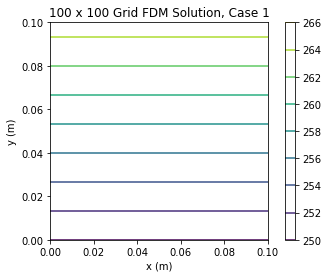

In [17]:
#Make a 2D Contour Plot
plt.contour(x,y,D)
ax = plt.gca()
ax.set_aspect('equal')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.colorbar()
plt.title('100 x 100 Grid FDM Solution, Case 1')